<a href="https://colab.research.google.com/github/schlaepf/CS4NLP_eSPD/blob/philippe/BERT_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 8.1 MB/s 
     |████████████████████████████████| 596 kB 67.6 MB/s 
     |████████████████████████████████| 101 kB 13.6 MB/s 
     |████████████████████████████████| 6.6 MB 46.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 6.9 MB/s 
     |████████████████████████████████| 140 kB 64.5 MB/s 
     |████████████████████████████████| 212 kB 68.4 MB/s 
     |████████████████████████████████| 1.1 MB 59.7 MB/s 
     |████████████████████████████████| 127 kB 68.9 MB/s 
     |████████████████████████████████| 144 kB 63.4 MB/s 
     |████████████████████████████████| 271 kB 77.0 MB/s 
     |███████████

In [ ]:
import argparse
import json
import os
import pandas as pd
import numpy as np
from transformers import AutoTokenizer,  TrainingArguments, Trainer, AutoModelForSequenceClassification
from datasets import load_metric, load_dataset


MODEL_NAME = "bhadresh-savani/bert-base-go-emotion"

In [ ]:
def load_model_and_tokenizer(model_name):
    print("loading tokenizer...")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    print("loading model...")
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    return model, tokenizer

model, tokenizer = load_model_and_tokenizer(MODEL_NAME)

train_args = TrainingArguments(
    output_dir='./predictions'
)

def tokenize_function(batch):
        '''
        1)Tokenize segments
        2)change labels to numerical
        '''
        tokenized_batch = tokenizer(batch["segment"], padding="max_length", truncation=True)
        return tokenized_batch

trainer = Trainer(
    model=model,
    args=train_args,
    #eval_dataset=test_data,
    tokenizer=tokenizer
)

# TODO: Replace the TODO with the path to the dataset (csv file; either training, validation or test)
data_path = os.path.join(TODO)

dataset = load_dataset('csv', data_files={'test': data_path}).shuffle(seed=42)
print("test_dataset:", dataset)
tokenized_dataset = dataset.map(tokenize_function, batched=True)

idx2chatID = dict()
chatID2label = dict()
for i, sample in enumerate(dataset['test']):
    chatID = dataset['test'][i]['chatName']
    idx2chatID[i] = chatID
    chatID2label[chatID] = dataset['test'][i]['label']

print(idx2chatID)
print("tokenized_dataset:", tokenized_dataset)
print(len(tokenized_dataset['test']))
test_dataset = tokenized_dataset["test"]
test_dataset = test_dataset.remove_columns(["chatName", "label"])  # TODO: save label & chatName columns

logits, labels, metrics = trainer.predict(test_dataset)
predictions = np.argmax(logits)


loading tokenizer...


loading file https://huggingface.co/bhadresh-savani/bert-base-go-emotion/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/4c96a964e155e818efbfa0e4028ce6fcea05041938d16fc3b1a1230a1b95f2fa.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bhadresh-savani/bert-base-go-emotion/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/ccdafae9b5243ac8740f596de397a6d383c9f8f585ede61dd394cc575f6f7974.59b3fc05e6327297545bda94ff9c1ef4b08d7fe92a7822f2260c164f54d0d152
loading file https://huggingface.co/bhadresh-savani/bert-base-go-emotion/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bhadresh-savani/bert-base-go-emotion/resolve/main/special_tokens_map.json from cache at /root/.cache/huggingface/transformers/7d53dc223c0d48aebf8b7874c00cf77be6fc8f2f69d0a52f8c34f8dd0c5a420e.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d
loading file https://hug

loading model...


loading configuration file https://huggingface.co/bhadresh-savani/bert-base-go-emotion/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/c5a36a4f597d69a5f7a635f0e520977763691ec8e54887938a9fdd55533879e7.e2774f67f3524b418c921a9cb85a15ce9a7946096166d9f3a4ace513b5a70ed9
Model config BertConfig {
  "_name_or_path": "bhadresh-savani/bert-base-go-emotion",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMultilabelSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "dim": 768,
  "dropout": 0.1,
  "hidden_act": "gelu",
  "hidden_dim": 3072,
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "admiration",
    "1": "amusement",
    "2": "anger",
    "3": "annoyance",
    "4": "approval",
    "5": "caring",
    "6": "confusion",
    "7": "curiosity",
    "8": "desire",
    "9": "disappointment",
    "10": "disapproval",
    "11": "disgust",
    "12": "emba

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-f605aaca5a38fa65/0.0.0/51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

test_dataset: DatasetDict({
    test: Dataset({
        features: ['label', 'chatName', 'segment'],
        num_rows: 13159
    })
})


  0%|          | 0/14 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: segment. If segment are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 13159
  Batch size = 8


{0: 'bff44e5cd15e7460ac0a389317ae811b', 1: 'd431253764205d33dc1581c514fac3aa', 2: '00f8322d0a403cdea61a9ea70cad9fe1', 3: '91d7f2fa0373cd353b678109b60ec7d7', 4: 'c09ae69423896add09461ed2dd43d7bd', 5: 'tulsapunker92-chrisidleone-ardmorewarrior1999-38', 6: 'smileman74-43', 7: 'johnchess2000-8', 8: '9f3be03db2f2eb07fd99cb08ac850563', 9: 'a05f4c4fd5f9c857af48c6d7d6158d32', 10: 'a0487d3b76276b2ab4fb3ab8ab3eb845', 11: 'f8291992a89a9e232f3428fa1dd83eab', 12: '26f08d2dfc03be53f582cf112fa57e2f', 13: '75e4190a4819378de0b60c8401943507', 14: 'e260de05246da5c6d65d0df1d7b0a683', 15: 'b7403fa2563589bd1ee9084926386050', 16: '59c0d0924067bde5b097b7cf6c4acd32', 17: 'f76b4ea6dd1d5e874f45915312b37323', 18: '03088328d294e7d5e23ba63e1e817d70', 19: 'thenamestheygivearedumb-6', 20: 'df160af0b72e044b927e48a2d283ea98', 21: 'ich_bin_der_eggman_67-5', 22: 'blkstallionfourwladies-63', 23: 'f31e36291353bfaa289fee10238aaca6', 24: '51077214ccfcaf535b9ec095de527967', 25: 'smileman74-35', 26: 'tim_arthur2001-15', 27: 'a

In [ ]:
from torch.nn import Softmax
import torch

In [ ]:
f = Softmax(dim=1)
logits_tensor = torch.from_numpy(logits)
probabilities = f(logits_tensor).numpy()

In [ ]:
predator_samples_probabilites = []
labels_string = [None]*len(model.config.id2label)
summary = dict()
for id, label in model.config.id2label.items():
  labels_string[id] = "bert_" + label

for i, probs in enumerate(probabilities):
  chatID = idx2chatID[i]
  if "label" not in summary:
    summary["label"] = [chatID2label[chatID]]
  else:
    summary["label"] += [chatID2label[chatID]]
  if "chatName" not in summary:
    summary["chatName"] = [chatID]
  else:
    summary["chatName"] += [chatID]
  for j, prob in enumerate(probs):
    emotion_label = labels_string[j]
    if emotion_label not in summary:
      summary[emotion_label] = [prob]
    else:
      summary[emotion_label] += [prob]
summary_df = pd.DataFrame.from_dict(summary)
summary_df

,label,chatName,bert_admiration,bert_amusement,bert_anger,bert_annoyance,bert_approval,bert_caring,bert_confusion,bert_curiosity,bert_desire,bert_disappointment,bert_disapproval,bert_disgust,bert_embarrassment,bert_excitement,bert_fear,bert_gratitude,bert_grief,bert_joy,bert_love,bert_nervousness,bert_optimism,bert_pride,bert_realization,bert_relief,bert_remorse,bert_sadness,bert_surprise,bert_neutral
0,non-predator,bff44e5cd15e7460ac0a389317ae811b,0.005386,0.001578,0.002074,0.005404,0.048052,0.006794,0.022946,0.073635,0.009553,0.001829,0.001684,0.000944,0.000612,0.008220,0.000771,0.001486,0.000257,0.004737,0.001647,0.000756,0.016512,0.001611,0.013525,0.000837,0.000483,0.001029,0.003049,0.764587
1,non-predator,d431253764205d33dc1581c514fac3aa,0.122774,0.410627,0.041828,0.070126,0.025227,0.002385,0.036610,0.055250,0.004053,0.009357,0.020767,0.014376,0.003691,0.013555,0.001040,0.001429,0.000352,0.029701,0.013961,0.000767,0.006872,0.003206,0.008881,0.000795,0.000502,0.001758,0.008375,0.091736
2,non-predator,00f8322d0a403cdea61a9ea70cad9fe1,0.038575,0.654589,0.002977,0.010863,0.017828,0.005698,0.039669,0.079165,0.001745,0.004653,0.012494,0.001799,0.001367,0.007669,0.000611,0.005701,0.000212,0.072253,0.003635,0.000668,0.009035,0.002424,0.006738,0.001808,0.000603,0.001542,0.002358,0.013320
3,non-predator,91d7f2fa0373cd353b678109b60ec7d7,0.121482,0.345654,0.004528,0.013107,0.014409,0.008313,0.041541,0.128626,0.001577,0.003355,0.009318,0.002233,0.001336,0.014889,0.000702,0.156110,0.000334,0.081973,0.002841,0.000793,0.005431,0.006325,0.005734,0.005958,0.000773,0.001205,0.003990,0.017460
4,non-predator,c09ae69423896add09461ed2dd43d7bd,0.022111,0.024003,0.012527,0.034356,0.023258,0.029027,0.121809,0.504367,0.001332,0.010972,0.021698,0.004357,0.003292,0.004052,0.001450,0.059195,0.000788,0.021855,0.001307,0.002247,0.006242,0.004167,0.011060,0.006645,0.002383,0.004277,0.002307,0.058916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13154,non-predator,bcdf86d4e75acb02e2c084a1e663de8a,0.055310,0.010161,0.042428,0.063235,0.034542,0.008450,0.094652,0.150304,0.007561,0.015052,0.039276,0.010618,0.003008,0.013255,0.001058,0.001429,0.000631,0.021031,0.281762,0.001253,0.008726,0.002401,0.010953,0.000934,0.000785,0.003414,0.004175,0.113592
13155,non-predator,ebf9c93e7854227117c85e9f585d5716,0.003202,0.006753,0.129651,0.132404,0.011920,0.004011,0.078704,0.250416,0.002329,0.010802,0.012587,0.013800,0.003019,0.004437,0.001704,0.000496,0.000510,0.002513,0.000648,0.001472,0.004035,0.000825,0.008275,0.000362,0.000737,0.001983,0.014648,0.297757
13156,predator,smileman74-33,0.041741,0.086525,0.013956,0.031474,0.024233,0.009857,0.056831,0.095322,0.006852,0.014217,0.025061,0.006883,0.004178,0.007119,0.001113,0.001238,0.000748,0.039100,0.452606,0.001208,0.010510,0.001796,0.010538,0.000953,0.001170,0.006855,0.001905,0.046011
13157,non-predator,e723a6c54626b8dabf31beef81b68155,0.009808,0.006235,0.293259,0.173136,0.041138,0.011315,0.002112,0.003680,0.066988,0.020412,0.017630,0.021675,0.004297,0.011401,0.002824,0.002800,0.002588,0.006176,0.013505,0.002726,0.018725,0.003261,0.007864,0.001151,0.001796,0.008807,0.002522,0.242167


In [ ]:
# TODO: replace the TODO variable with the path to the csv file with the additional features
path_additional_features = os.path.join(TODO)
df_add_features = pd.read_csv(path_additional_features)
df_add_features

,label,chatName,segment,length_rel,length_abs,num_questions_rel,num_questions_abs,size_of_words_rel,size_of_words_abs,empath_help,empath_office,empath_dance,empath_money,empath_wedding,empath_domestic_work,empath_sleep,empath_medical_emergency,empath_cold,empath_hate,empath_cheerfulness,empath_aggression,empath_occupation,empath_envy,empath_anticipation
0,non-predator,a1b6b8ea4161b4146487ef37be056eda,"[CLS] hey, 19 f lesbian, looking to exchange h...",0.029070,678.0,1.000000,2.0,0.294695,192.184511,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,non-predator,2fa014e52cc4d54abf0b678c0ab24d51,[CLS] hi hi asl? 14 f australia u 15 paris m/f...,0.221239,201.0,0.500000,6.0,0.317308,102.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,non-predator,277f6dfa33ffb6b33c4431b2a91e0a20,[CLS] hii sup how r u hey im good and you from...,0.262295,318.0,0.000000,0.0,0.267049,69.400560,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,non-predator,f754ca4250b5a70c1fab65201ebfd934,"[CLS] hi hey 18 f China,U? asl 20 m nepal ok w...",0.076923,375.0,0.200000,9.0,0.368190,133.944444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,non-predator,5ee4f03014e750d2a529250f7d27cd1e,[CLS] hi hey m or f f you? m hey how old are y...,0.432099,127.0,0.250000,7.0,0.304945,51.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13154,non-predator,6377d2c072798e7ef0fd22f0769fdbae,[CLS] 15 m hey im 15 f from hey im bobby usa c...,0.131579,994.0,0.857143,8.0,0.227453,221.526190,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
13155,non-predator,a2378441841247f277c54964860db8c9,[CLS] hiii hw r u hiiii are you okay ya u too ...,0.109890,172.0,0.000000,0.0,0.123126,68.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13156,non-predator,497ec625519d6e28dd360be81d01dbbd,[CLS] Why should interruptions be more problem...,0.811240,3067.0,0.333333,5.0,0.808098,283.292332,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
13157,non-predator,dfbec532af50f894e0961bb5ef935c4c,[CLS] boo aaaaaaaaaah :o you scared me Yes I s...,0.060071,549.0,0.750000,5.0,0.315303,137.597619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_add_features = df_add_features.merge(summary_df, on=['chatName', 'label'])
df_add_features


,label,chatName,segment,length_rel,length_abs,num_questions_rel,num_questions_abs,size_of_words_rel,size_of_words_abs,empath_help,empath_office,empath_dance,empath_money,empath_wedding,empath_domestic_work,empath_sleep,empath_medical_emergency,empath_cold,empath_hate,empath_cheerfulness,empath_aggression,empath_occupation,empath_envy,empath_anticipation,bert_admiration,bert_amusement,bert_anger,bert_annoyance,bert_approval,bert_caring,bert_confusion,bert_curiosity,bert_desire,bert_disappointment,bert_disapproval,bert_disgust,bert_embarrassment,bert_excitement,bert_fear,bert_gratitude,bert_grief,bert_joy,bert_love,bert_nervousness,bert_optimism,bert_pride,bert_realization,bert_relief,bert_remorse,bert_sadness,bert_surprise,bert_neutral
0,non-predator,a1b6b8ea4161b4146487ef37be056eda,"[CLS] hey, 19 f lesbian, looking to exchange h...",0.029070,678.0,1.000000,2.0,0.294695,192.184511,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.004262,0.577338,0.011259,0.042803,0.014820,0.017645,0.028977,0.052216,0.001422,0.024207,0.024087,0.008768,0.009401,0.002151,0.001459,0.003963,0.001981,0.020109,0.001525,0.002153,0.007467,0.001057,0.016016,0.001729,0.018841,0.032203,0.001356,0.070786
1,non-predator,2fa014e52cc4d54abf0b678c0ab24d51,[CLS] hi hi asl? 14 f australia u 15 paris m/f...,0.221239,201.0,0.500000,6.0,0.317308,102.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014364,0.048175,0.005101,0.020957,0.026615,0.002230,0.204841,0.252791,0.002799,0.007399,0.018189,0.003593,0.002132,0.003558,0.001115,0.000851,0.000276,0.008640,0.002271,0.001082,0.005519,0.001187,0.019526,0.000652,0.000571,0.001996,0.005389,0.338181
2,non-predator,277f6dfa33ffb6b33c4431b2a91e0a20,[CLS] hii sup how r u hey im good and you from...,0.262295,318.0,0.000000,0.0,0.267049,69.400560,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027144,0.197417,0.006139,0.021484,0.091190,0.019484,0.005565,0.009450,0.007588,0.004291,0.009635,0.002748,0.001384,0.004522,0.000870,0.004268,0.000320,0.024863,0.005405,0.000802,0.025281,0.003973,0.019695,0.002152,0.000487,0.001304,0.001061,0.501481
3,non-predator,f754ca4250b5a70c1fab65201ebfd934,"[CLS] hi hey 18 f China,U? asl 20 m nepal ok w...",0.076923,375.0,0.200000,9.0,0.368190,133.944444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.013605,0.020933,0.008015,0.026785,0.026161,0.061560,0.075153,0.459992,0.006533,0.008640,0.019016,0.004510,0.002041,0.004515,0.002334,0.036886,0.000615,0.014157,0.000793,0.002246,0.111639,0.003057,0.008542,0.003452,0.002128,0.002979,0.002247,0.071468
4,non-predator,5ee4f03014e750d2a529250f7d27cd1e,[CLS] hi hey m or f f you? m hey how old are y...,0.432099,127.0,0.250000,7.0,0.304945,51.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001983,0.003004,0.019041,0.030810,0.013952,0.003598,0.127849,0.326949,0.003156,0.004553,0.007101,0.003212,0.001506,0.002939,0.001264,0.000574,0.000308,0.002013,0.000986,0.001153,0.004356,0.000635,0.010092,0.000315,0.000499,0.001261,0.008219,0.418671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13154,non-predator,6377d2c072798e7ef0fd22f0769fdbae,[CLS] 15 m hey im 15 f from hey im bobby usa c...,0.131579,994.0,0.857143,8.0,0.227453,221.526190,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.017165,0.470757,0.019830,0.056860,0.019156,0.004248,0.079643,0.096536,0.003588,0.010971,0.036006,0.009324,0.003989,0.005180,0.001136,0.000810,0.000432,0.039622,0.021128,0.001099,0.007855,0.001591,0.011055,0.000818,0.000697,0.002752,0.002364,0.075391
13155,non-predator,a2378441841247f277c54964860db8c9,[CLS] hiii hw r u hiiii are you okay ya u too ...,0.109890,172.0,0.000000,0.0,0.123126,68.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005741,0.071966,0.020028,0.034517,0.021472,0.007511,0.001103,0.001002,0.001696

Here we save the newly created 

In [ ]:
df_add_features.to_csv(os.path.join('drive', 'MyDrive', 'ETH', 'CS4NLP', 'Project', 'Datasets', 'PANC', 'PANC-test_add_features_emotion.csv'))

## Just some printing of the dataframes

In [ ]:
pd.options.display.max_columns = None

In [ ]:
df_summ_grouped = summary_df.groupby('label').std()
df_summ_grouped

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,
non-predator,0.054277,0.231516,0.064470,0.054258,0.018089,0.015268,0.054170,0.148698,0.007996,0.015498,0.016383,0.012003,0.005228,0.013091,0.006659,0.082902,0.001204,0.030982,0.055608,0.002837,0.018672,0.002304,0.010268,0.003721,0.017982,0.021204,0.018374,0.227114
predator,0.033267,0.261158,0.024161,0.034344,0.018740,0.024859,0.045284,0.124901,0.027724,0.022959,0.013256,0.009080,0.006059,0.013679,0.018894,0.034725,0.002378,0.046609,0.097887,0.005626,0.069534,0.001675,0.009905,0.002092,0.045186,0.042489,0.009289,0.129369


In [ ]:
df_predators = summary_df[summary_df['label'] == 'predator']
display(df_predators.describe())

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000
mean,0.022022,0.284108,0.015832,0.038928,0.024937,0.014139,0.059846,0.159221,0.015174,0.019721,0.019570,0.007383,0.005942,0.008643,0.003463,0.007749,0.001452,0.039703,0.036839,0.003216,0.040347,0.002325,0.016026,0.001810,0.011506,0.018981,0.004941,0.116173
std,0.033267,0.261158,0.024161,0.034344,0.018740,0.024859,0.045284,0.124901,0.027724,0.022959,0.013256,0.009080,0.006059,0.013679,0.018894,0.034725,0.002378,0.046609,0.097887,0.005626,0.069534,0.001675,0.009905,0.002092,0.045186,0.042489,0.009289,0.129369
min,0.001192,0.000756,0.000845,0.001786,0.004105,0.000957,0.000519,0.000798,0.000663,0.001361,0.001447,0.000632,0.000531,0.000930,0.000426,0.000297,0.000112,0.000855,0.000271,0.000242,0.001210,0.000291,0.002809,0.000243,0.000222,0.000834,0.000423,0.002005
25%,0.005759,0.014926,0.005165,0.016346,0.013537,0.003953,0.028285,0.064280,0.003536,0.007502,0.010054,0.003184,0.002387,0.003403,0.001055,0.000871,0.000390,0.014061,0.001577,0.001092,0.009337,0.001257,0.009671,0.000887,0.000806,0.002866,0.002028,0.034161
50%,0.012141,0.233507,0.009043,0.027805,0.020684,0.007015,0.051046,0.131076,0.006864,0.012646,0.016704,0.005114,0.003873,0.005561,0.001576,0.001411,0.000663,0.028456,0.002639,0.001777,0.017744,0.001854,0.013900,0.001240,0.001315,0.005159,0.003057,0.071098
75%,0.025852,0.505765,0.016666,0.047934,0.030270,0.013275,0.081188,0.226768,0.016040,0.021768,0.024885,0.008725,0.006850,0.009644,0.002559,0.003518,0.001359,0.049529,0.010747,0.003252,0.040397,0.002847,0.019529,0.001931,0.003428,0.013251,0.004995,0.143261
max,0.570455,0.921648,0.295217,0.286446,0.256215,0.445596,0.443896,0.770156,0.435816,0.223287,0.112875,0.240665,0.050488,0.350573,0.607815,0.631336,0.030337,0.548497,0.870618,0.113726,0.814098,0.019871,0.097458,0.029148,0.574408,0.570107,0.193229,0.921369


In [ ]:
df_non_predators = summary_df[summary_df['label'] == 'non-predator']
df_non_predators.describe()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
count,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000
mean,0.034316,0.162595,0.035295,0.057766,0.024273,0.008864,0.073670,0.194928,0.004637,0.015393,0.020591,0.009837,0.004542,0.009211,0.002083,0.022130,0.000870,0.026671,0.016361,0.002260,0.011192,0.002616,0.015647,0.002230,0.003874,0.008249,0.008960,0.220939
std,0.054277,0.231516,0.064470,0.054258,0.018089,0.015268,0.054170,0.148698,0.007996,0.015498,0.016383,0.012003,0.005228,0.013091,0.006659,0.082902,0.001204,0.030982,0.055608,0.002837,0.018672,0.002304,0.010268,0.003721,0.017982,0.021204,0.018374,0.227114
min,0.000970,0.000439,0.000290,0.000931,0.001813,0.000519,0.000385,0.000323,0.000308,0.000329,0.000583,0.000224,0.000195,0.000459,0.000141,0.000217,0.000090,0.000546,0.000146,0.000153,0.000663,0.000261,0.000992,0.000156,0.000117,0.000282,0.000369,0.001993
25%,0.005330,0.006036,0.007074,0.019877,0.012400,0.002826,0.033576,0.072183,0.001862,0.006064,0.009318,0.003343,0.001877,0.003330,0.000941,0.000768,0.000341,0.005134,0.001023,0.000948,0.004454,0.001127,0.008659,0.000700,0.000591,0.001893,0.002954,0.049588
50%,0.014941,0.027981,0.014443,0.038384,0.019842,0.004538,0.064826,0.166537,0.002896,0.010957,0.016276,0.006002,0.003022,0.005789,0.001358,0.001440,0.000517,0.016951,0.001798,0.001546,0.006782,0.001910,0.013173,0.001160,0.000871,0.003105,0.004927,0.134700
75%,0.038904,0.254167,0.032440,0.075054,0.030751,0.008839,0.102432,0.294262,0.004741,0.018834,0.027238,0.011831,0.005153,0.010487,0.002030,0.003873,0.000875,0.036887,0.003869,0.002601,0.011137,0.003338,0.019851,0.002201,0.001489,0.005870,0.008863,0.316181
max,0.733775,0.930244,0.736319,0.348802,0.288905,0.549546,0.646226,0.818599,0.287280,0.216593,0.185761,0.283955,0.139197,0.468345,0.386657,0.938052,0.030704,0.398714,0.735511,0.068624,0.408106,0.026292,0.214872,0.086978,0.606830,0.531465,0.562276,0.968172


In [ ]:
pd.concat([df_predators.describe().loc['mean'], df_non_predators.describe().loc['mean']])

admiration        0.022022
amusement         0.284108
anger             0.015832
annoyance         0.038928
approval          0.024937
caring            0.014139
confusion         0.059846
curiosity         0.159221
desire            0.015174
disappointment    0.019721
disapproval       0.019570
disgust           0.007383
embarrassment     0.005942
excitement        0.008643
fear              0.003463
gratitude         0.007749
grief             0.001452
joy               0.039703
love              0.036839
nervousness       0.003216
optimism          0.040347
pride             0.002325
realization       0.016026
relief            0.001810
remorse           0.011506
sadness           0.018981
surprise          0.004941
neutral           0.116173
admiration        0.034316
amusement         0.162595
anger             0.035295
annoyance         0.057766
approval          0.024273
caring            0.008864
confusion         0.073670
curiosity         0.194928
desire            0.004637
d

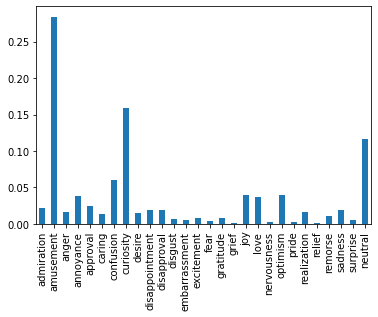

In [ ]:
df_predators.describe().loc['mean'].plot.bar();

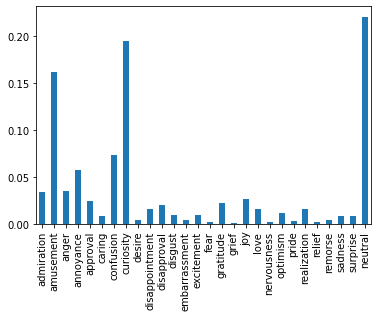

In [ ]:
df_non_predators.describe().loc['mean'].plot.bar();